In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

In [2]:
np.array([293, 133, 58]) * 0.0254

array([7.4422, 3.3782, 1.4732])

grid size = 0.451 meters (17.75 inches)

3.25 inches & 14 inches

<br/>04: 1.473 meters (58 inches)
<br/>72: 1.422 meters (56 inches)
<br/>73: 1.803 meters (71 inches)
<br/>50: 1.473 meters (58 inches)

Room size = 14 by 14 grids: 6.312 * 6.312 meters (248.5 * 248.5 inches)

Test coordinate system
<br/>50: (0.000, 0.000, 1.473) in meters, (0, 0, 58) in inches
<br/>73: (3.073,-0.356, 1.829) in meters, (121, -14, 72) in inches
<br/>04: (3.607, 3.607, 1.473) in meters, (142, 142, 58) in inches
<br/>72: (0.000, 3.607, 1.422) in meters, (0, 142, 56) in inches

*tag 010-000-033-041: (2.254, 1.803, 0) in meters, (88.75, 71, 0) in inches

# Plot the room extent

In [3]:
# define vertices of the room
bottom = np.array(((0, 0, 0), (0, 7.37, 0), (7.88, 7.37, 0), (7.88, 0, 0)))
bottom

array([[0.  , 0.  , 0.  ],
       [0.  , 7.37, 0.  ],
       [7.88, 7.37, 0.  ],
       [7.88, 0.  , 0.  ]])

In [4]:
top = np.zeros((4, 3))
top[:, 2] += 3.5
top += bottom
top

array([[0.  , 0.  , 3.5 ],
       [0.  , 7.37, 3.5 ],
       [7.88, 7.37, 3.5 ],
       [7.88, 0.  , 3.5 ]])

<IPython.core.display.Javascript object>


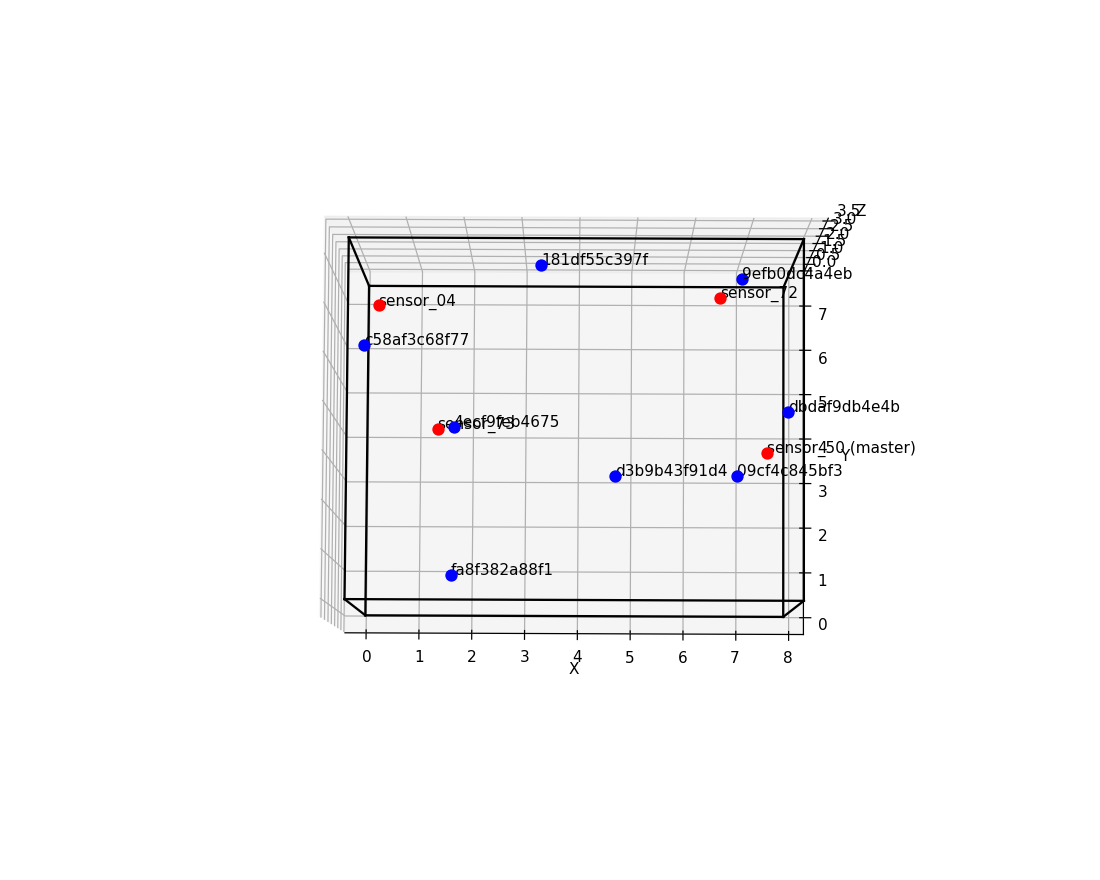

In [5]:
fig_1 = plt.figure(figsize=(10, 8))
ax = fig_1.add_subplot(111, projection='3d')
for s, e in combinations(np.concatenate([bottom, top]), 2):
    vector = s - e
    if(np.count_nonzero(vector) == 1):
        x, y, z = zip(s, e)
        ax.plot(x, y, z, color='k')
plt.show()

# Plot the location of sensors

50: (0.000, 0.000, 1.473) in meters, (0, 0, 58) in inches
<br/>73: (3.073,-0.356, 1.829) in meters, (121, -14, 72) in inches
<br/>04: (3.607, 3.607, 1.473) in meters, (142, 142, 58) in inches
<br/>72: (0.000, 3.607, 1.422) in meters, (0, 142, 56) in inches

In [6]:
sensors = {"50 (master)": (7.442, 3.378, 1.473),
           "73": (1.397,3.962, 1.016),
           "04": (0.33, 6.528, 1.473),
           "72":  (6.579, 6.731, 1.422)}

for sensor in sensors:
    ax.scatter(sensors[sensor][0], sensors[sensor][1], sensors[sensor][2], s=50, color='red')
    ax.text(sensors[sensor][0], sensors[sensor][1], sensors[sensor][2], "sensor_" + sensor)

In [7]:
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

Text(0.08315070352004839, 0.01114008192913825, 'Z')

# Plot beacon locations

room dimensions:

x: 7.88 meter
y: 7.37 meter

beacon_loc = {

"c58af3c68f77": (0.1016, 5.6174, 1.6764),
"4ecf9feb4675": (1.7018, 3.9664, 1.1684),
"fa8f382a88f1": (1.7018, 0.7151, 1.5748),
"d3b9b43f91d4": (4.6796, 2.9757, 0.8636),
"09cf4c845bf3": (6.9402, 2.9757, 0.8636),
"dbdaf9db4e4b": (7.8800, 4.3981, 0.8128),
"9efb0dc4a4eb": (7.0418, 7.3700, 0.6096),
"181df55c397f": (3.3020, 7.3700, 1.6256)

}

In [8]:
beacon_loc = {

"c58af3c68f77": (0.1016, 5.6174, 1.6764),
"4ecf9feb4675": (1.7018, 3.9664, 1.1684),
"fa8f382a88f1": (1.7018, 0.7151, 1.5748),
"d3b9b43f91d4": (4.6796, 2.9757, 0.8636),
"09cf4c845bf3": (6.9402, 2.9757, 0.8636),
"dbdaf9db4e4b": (7.8800, 4.3981, 0.8128),
"9efb0dc4a4eb": (7.0418, 7.3700, 0.6096),
"181df55c397f": (3.3020, 7.3700, 1.6256)

}

In [9]:
for beacon in beacon_loc:
    ax.scatter(beacon_loc[beacon][0], beacon_loc[beacon][1], beacon_loc[beacon][2], s=50, color='blue')
    ax.text(beacon_loc[beacon][0], beacon_loc[beacon][1], beacon_loc[beacon][2], beacon)

# UWB data preprocess

In [51]:
UWB_data = pd.read_csv("UWB_data_0728.csv", names=["time", "x", "y", "z"])
UWB_data['time'] = pd.to_datetime(UWB_data.loc[:, 'time'], format="%m/%d/%y %H:%M:%S")
UWB_data.index = UWB_data['time']
UWB_data = UWB_data.iloc[:, 1:]
UWB_data = UWB_data.dropna()
UWB_data = UWB_data.astype(float)
UWB_data

,x,y,z
time,,,
2020-07-28 17:01:06,1.88208,5.28187,0.855865
2020-07-28 17:01:06,1.87710,5.27430,0.858367
2020-07-28 17:01:07,1.86467,5.26580,0.860434
2020-07-28 17:01:07,1.86225,5.26773,0.861385
2020-07-28 17:01:07,1.85680,5.27221,0.853373
...,...,...,...
2020-07-28 17:59:59,1.51190,5.04387,1.529970
2020-07-28 18:00:00,1.31715,4.93822,0.892075
2020-07-28 18:00:00,1.32802,4.93386,0.879885


In [ ]:
#ax.scatter(list(UWB_data['x']), list(UWB_data['y']), list(UWB_data['z']), s=5, color='k', alpha=0.2)

# BLE data preprocess

In [18]:
csv_file = "CSV_20200728.csv"
BLE_data = pd.read_csv(csv_file, names=["locid", "time", "uid", "rssi"])
BLE_data.rssi = BLE_data.rssi.astype(int)
BLE_data['time'] = csv_file.replace("CSV_", "").replace(".csv", " ") + BLE_data['time'].astype(str)
BLE_data['time'] = pd.to_datetime(BLE_data['time'], format="%Y%m%d %H:%M:%S:%f")
BLE_data

,locid,time,uid,rssi
0,Buell_322,2020-07-28 17:04:12.136,dbdaf9db4e4b,-66
1,Buell_322,2020-07-28 17:04:12.178,dbdaf9db4e4b,-66
2,Buell_322,2020-07-28 17:04:12.178,d3b9b43f91d4,-70
3,Buell_322,2020-07-28 17:04:12.181,dbdaf9db4e4b,-66
4,Buell_322,2020-07-28 17:04:12.181,d3b9b43f91d4,-70
...,...,...,...,...
131788,Buell_322,2020-07-28 18:00:07.443,b2b41678058b,-92
131789,Buell_322,2020-07-28 18:00:07.443,d3b9b43f91d4,-70
131790,Buell_322,2020-07-28 18:00:07.443,4ecf9feb4675,-61
131791,Buell_322,2020-07-28 18:00:07.443,4a3bd98b9fa1,-83


In [14]:
BLE_data.head()

,locid,time,uid,rssi
0,Buell_322,20200728.csv17:04:12:136,dbdaf9db4e4b,-66
1,Buell_322,20200728.csv17:04:12:178,dbdaf9db4e4b,-66
2,Buell_322,20200728.csv17:04:12:178,d3b9b43f91d4,-70
3,Buell_322,20200728.csv17:04:12:181,dbdaf9db4e4b,-66
4,Buell_322,20200728.csv17:04:12:181,d3b9b43f91d4,-70


In [19]:
sample_beacon = '181df55c397f'

In [77]:
temp = BLE_data[BLE_data['uid'] == sample_beacon]
temp.index = temp['time']
temp.head()

,locid,time,uid,rssi
time,,,,
2020-07-28 17:04:12.228,Buell_322,2020-07-28 17:04:12.228,181df55c397f,-69
2020-07-28 17:04:12.229,Buell_322,2020-07-28 17:04:12.229,181df55c397f,-69
2020-07-28 17:04:12.230,Buell_322,2020-07-28 17:04:12.230,181df55c397f,-69
2020-07-28 17:04:12.244,Buell_322,2020-07-28 17:04:12.244,181df55c397f,-69
2020-07-28 17:04:12.346,Buell_322,2020-07-28 17:04:12.346,181df55c397f,-69


# Map ground truth locations to BLE data

In [78]:
temp.loc[:, 'x'] = np.nan
temp.loc[:, 'y'] = np.nan
temp.loc[:, 'z'] = np.nan
temp.head()

C:\Users\RISE-Alienware2\Anaconda3\envs\cdi\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\RISE-Alienware2\Anaconda3\envs\cdi\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,locid,time,uid,rssi,x,y,z
time,,,,,,,
2020-07-28 17:04:12.228,Buell_322,2020-07-28 17:04:12.228,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.229,Buell_322,2020-07-28 17:04:12.229,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.230,Buell_322,2020-07-28 17:04:12.230,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.244,Buell_322,2020-07-28 17:04:12.244,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.346,Buell_322,2020-07-28 17:04:12.346,181df55c397f,-69,NaN,NaN,NaN


In [62]:
UWB_data[UWB_data.index > temp.index[0]][:50]

,x,y,z
time,,,
2020-07-28 17:04:13,4.51261,6.16827,1.144100
2020-07-28 17:04:13,4.52120,6.17028,1.140530
2020-07-28 17:04:14,4.77132,6.22056,1.122970
2020-07-28 17:04:14,4.77716,6.22448,1.120180
2020-07-28 17:04:15,5.01491,6.22768,1.107050
2020-07-28 17:04:15,5.02292,6.22011,1.106820
2020-07-28 17:04:16,5.17249,6.09166,1.105380
2020-07-28 17:04:16,5.18190,6.09464,1.103150
2020-07-28 17:04:16,5.34837,6.21044,1.102410


In [61]:
temp.head(50)

,locid,time,uid,rssi,x,y,z
time,,,,,,,
2020-07-28 17:04:12.228,Buell_322,2020-07-28 17:04:12.228,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.229,Buell_322,2020-07-28 17:04:12.229,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.230,Buell_322,2020-07-28 17:04:12.230,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.244,Buell_322,2020-07-28 17:04:12.244,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.346,Buell_322,2020-07-28 17:04:12.346,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.413,Buell_322,2020-07-28 17:04:12.413,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.415,Buell_322,2020-07-28 17:04:12.415,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.483,Buell_322,2020-07-28 17:04:12.483,181df55c397f,-69,NaN,NaN,NaN
2020-07-28 17:04:12.531,Buell_322,2020-07-28 17:04:12.531,181df55c397f,-69,NaN,NaN,NaN


In [79]:
from datetime import timedelta

t_buffer = timedelta(microseconds=500000)

for t_ble in temp.index:
    for t_uwb in UWB_data.index:
        if (t_ble >= t_uwb - t_buffer) & (t_ble < t_uwb + t_buffer):
            try:
                temp.loc[t_ble, 'x'] = UWB_data.loc[t_uwb, 'x'][0]
                temp.loc[t_ble, 'y'] = UWB_data.loc[t_uwb, 'y'][0]
                temp.loc[t_ble, 'z'] = UWB_data.loc[t_uwb, 'z'][0]
                break
            except:
                temp.loc[t_ble, 'x'] = UWB_data.loc[t_uwb, 'x']
                temp.loc[t_ble, 'y'] = UWB_data.loc[t_uwb, 'y']
                temp.loc[t_ble, 'z'] = UWB_data.loc[t_uwb, 'z']
                break
    print(t_ble)    
temp

C:\Users\RISE-Alienware2\Anaconda3\envs\cdi\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


2020-07-28 17:04:12.228000
2020-07-28 17:04:12.229000
2020-07-28 17:04:12.230000
2020-07-28 17:04:12.244000
2020-07-28 17:04:12.346000
2020-07-28 17:04:12.413000
2020-07-28 17:04:12.415000
2020-07-28 17:04:12.483000
2020-07-28 17:04:12.531000
2020-07-28 17:04:12.613000
2020-07-28 17:04:17.070000
2020-07-28 17:04:17.131000
2020-07-28 17:04:17.134000
2020-07-28 17:04:17.138000
2020-07-28 17:04:17.139000
2020-07-28 17:04:17.141000
2020-07-28 17:04:17.237000
2020-07-28 17:04:17.263000
2020-07-28 17:04:17.329000
2020-07-28 17:04:17.373000
2020-07-28 17:04:17.400000
2020-07-28 17:04:17.635000
2020-07-28 17:04:17.686000
2020-07-28 17:04:22.141000
2020-07-28 17:04:22.144000
2020-07-28 17:04:22.192000
2020-07-28 17:04:22.195000
2020-07-28 17:04:22.198000
2020-07-28 17:04:22.200000
2020-07-28 17:04:22.201000
2020-07-28 17:04:22.202000
2020-07-28 17:04:22.204000
2020-07-28 17:04:22.205000
2020-07-28 17:04:22.206000
2020-07-28 17:04:22.208000
2020-07-28 17:04:22.223000
2020-07-28 17:04:22.224000
2

2020-07-28 17:06:02.143000
2020-07-28 17:06:02.145000
2020-07-28 17:06:02.146000
2020-07-28 17:06:02.148000
2020-07-28 17:06:02.149000
2020-07-28 17:06:02.150000
2020-07-28 17:06:02.152000
2020-07-28 17:06:02.154000
2020-07-28 17:06:02.155000
2020-07-28 17:06:02.297000
2020-07-28 17:06:02.336000
2020-07-28 17:06:02.388000
2020-07-28 17:06:02.390000
2020-07-28 17:06:02.485000
2020-07-28 17:06:02.581000
2020-07-28 17:06:02.631000
2020-07-28 17:06:02.653000
2020-07-28 17:06:07.088000
2020-07-28 17:06:07.136000
2020-07-28 17:06:07.143000
2020-07-28 17:06:07.148000
2020-07-28 17:06:07.150000
2020-07-28 17:06:07.151000
2020-07-28 17:06:07.152000
2020-07-28 17:06:07.153000
2020-07-28 17:06:07.155000
2020-07-28 17:06:07.167000
2020-07-28 17:06:07.172000
2020-07-28 17:06:07.190000
2020-07-28 17:06:07.191000
2020-07-28 17:06:07.192000
2020-07-28 17:06:07.216000
2020-07-28 17:06:07.244000
2020-07-28 17:06:07.346000
2020-07-28 17:06:07.401000
2020-07-28 17:06:07.514000
2020-07-28 17:06:07.566000
2

2020-07-28 17:07:17.082000
2020-07-28 17:07:17.135000
2020-07-28 17:07:17.137000
2020-07-28 17:07:17.138000
2020-07-28 17:07:17.139000
2020-07-28 17:07:17.141000
2020-07-28 17:07:17.289000
2020-07-28 17:07:17.291000
2020-07-28 17:07:17.306000
2020-07-28 17:07:17.417000
2020-07-28 17:07:17.460000
2020-07-28 17:07:17.573000
2020-07-28 17:07:22.111000
2020-07-28 17:07:22.159000
2020-07-28 17:07:22.163000
2020-07-28 17:07:22.166000
2020-07-28 17:07:22.168000
2020-07-28 17:07:22.170000
2020-07-28 17:07:22.189000
2020-07-28 17:07:22.190000
2020-07-28 17:07:22.191000
2020-07-28 17:07:22.202000
2020-07-28 17:07:22.356000
2020-07-28 17:07:22.401000
2020-07-28 17:07:22.437000
2020-07-28 17:07:22.498000
2020-07-28 17:07:22.598000
2020-07-28 17:07:27.102000
2020-07-28 17:07:27.150000
2020-07-28 17:07:27.152000
2020-07-28 17:07:27.154000
2020-07-28 17:07:27.155000
2020-07-28 17:07:27.156000
2020-07-28 17:07:27.157000
2020-07-28 17:07:27.159000
2020-07-28 17:07:27.159000
2020-07-28 17:07:27.160000
2

2020-07-28 17:08:47.256000
2020-07-28 17:08:47.274000
2020-07-28 17:08:47.276000
2020-07-28 17:08:47.345000
2020-07-28 17:08:47.402000
2020-07-28 17:08:47.426000
2020-07-28 17:08:47.530000
2020-07-28 17:08:47.610000
2020-07-28 17:08:47.653000
2020-07-28 17:08:52.094000
2020-07-28 17:08:52.144000
2020-07-28 17:08:52.148000
2020-07-28 17:08:52.149000
2020-07-28 17:08:52.151000
2020-07-28 17:08:52.152000
2020-07-28 17:08:52.153000
2020-07-28 17:08:52.154000
2020-07-28 17:08:52.158000
2020-07-28 17:08:52.159000
2020-07-28 17:08:52.173000
2020-07-28 17:08:52.174000
2020-07-28 17:08:52.175000
2020-07-28 17:08:52.192000
2020-07-28 17:08:52.224000
2020-07-28 17:08:52.251000
2020-07-28 17:08:52.253000
2020-07-28 17:08:52.276000
2020-07-28 17:08:52.299000
2020-07-28 17:08:52.344000
2020-07-28 17:08:52.383000
2020-07-28 17:08:52.385000
2020-07-28 17:08:52.497000
2020-07-28 17:08:52.557000
2020-07-28 17:08:52.630000
2020-07-28 17:08:57.112000
2020-07-28 17:08:57.169000
2020-07-28 17:08:57.171000
2

2020-07-28 17:10:02.307000
2020-07-28 17:10:02.333000
2020-07-28 17:10:02.438000
2020-07-28 17:10:02.492000
2020-07-28 17:10:02.524000
2020-07-28 17:10:02.573000
2020-07-28 17:10:02.609000
2020-07-28 17:10:02.612000
2020-07-28 17:10:07.096000
2020-07-28 17:10:07.152000
2020-07-28 17:10:07.155000
2020-07-28 17:10:07.231000
2020-07-28 17:10:07.279000
2020-07-28 17:10:07.301000
2020-07-28 17:10:07.368000
2020-07-28 17:10:07.538000
2020-07-28 17:10:07.605000
2020-07-28 17:10:12.112000
2020-07-28 17:10:12.169000
2020-07-28 17:10:12.172000
2020-07-28 17:10:12.174000
2020-07-28 17:10:12.175000
2020-07-28 17:10:12.177000
2020-07-28 17:10:12.187000
2020-07-28 17:10:12.188000
2020-07-28 17:10:12.189000
2020-07-28 17:10:12.200000
2020-07-28 17:10:12.202000
2020-07-28 17:10:12.203000
2020-07-28 17:10:12.204000
2020-07-28 17:10:12.224000
2020-07-28 17:10:12.226000
2020-07-28 17:10:12.241000
2020-07-28 17:10:12.258000
2020-07-28 17:10:12.273000
2020-07-28 17:10:12.306000
2020-07-28 17:10:12.369000
2

2020-07-28 17:11:17.499000
2020-07-28 17:11:22.101000
2020-07-28 17:11:22.117000
2020-07-28 17:11:22.164000
2020-07-28 17:11:22.166000
2020-07-28 17:11:22.168000
2020-07-28 17:11:22.169000
2020-07-28 17:11:22.170000
2020-07-28 17:11:22.171000
2020-07-28 17:11:22.173000
2020-07-28 17:11:22.175000
2020-07-28 17:11:22.187000
2020-07-28 17:11:22.188000
2020-07-28 17:11:22.189000
2020-07-28 17:11:22.228000
2020-07-28 17:11:22.279000
2020-07-28 17:11:22.325000
2020-07-28 17:11:22.349000
2020-07-28 17:11:22.405000
2020-07-28 17:11:22.449000
2020-07-28 17:11:22.451000
2020-07-28 17:11:22.477000
2020-07-28 17:11:22.536000
2020-07-28 17:11:22.595000
2020-07-28 17:11:22.643000
2020-07-28 17:11:27.093000
2020-07-28 17:11:27.147000
2020-07-28 17:11:27.151000
2020-07-28 17:11:27.153000
2020-07-28 17:11:27.156000
2020-07-28 17:11:27.159000
2020-07-28 17:11:27.160000
2020-07-28 17:11:27.161000
2020-07-28 17:11:27.163000
2020-07-28 17:11:27.164000
2020-07-28 17:11:27.165000
2020-07-28 17:11:27.188000
2

2020-07-28 17:12:32.174000
2020-07-28 17:12:32.194000
2020-07-28 17:12:32.196000
2020-07-28 17:12:32.197000
2020-07-28 17:12:32.208000
2020-07-28 17:12:32.227000
2020-07-28 17:12:32.284000
2020-07-28 17:12:32.331000
2020-07-28 17:12:32.361000
2020-07-28 17:12:32.363000
2020-07-28 17:12:32.364000
2020-07-28 17:12:32.501000
2020-07-28 17:12:37.121000
2020-07-28 17:12:37.173000
2020-07-28 17:12:37.175000
2020-07-28 17:12:37.176000
2020-07-28 17:12:37.177000
2020-07-28 17:12:37.179000
2020-07-28 17:12:37.180000
2020-07-28 17:12:37.181000
2020-07-28 17:12:37.182000
2020-07-28 17:12:37.183000
2020-07-28 17:12:37.184000
2020-07-28 17:12:37.185000
2020-07-28 17:12:37.186000
2020-07-28 17:12:37.202000
2020-07-28 17:12:37.247000
2020-07-28 17:12:37.282000
2020-07-28 17:12:37.330000
2020-07-28 17:12:37.332000
2020-07-28 17:12:37.589000
2020-07-28 17:12:42.095000
2020-07-28 17:12:42.100000
2020-07-28 17:12:42.149000
2020-07-28 17:12:42.151000
2020-07-28 17:12:42.153000
2020-07-28 17:12:42.164000
2

2020-07-28 17:13:42.528000
2020-07-28 17:13:42.615000
2020-07-28 17:13:47.095000
2020-07-28 17:13:47.102000
2020-07-28 17:13:47.144000
2020-07-28 17:13:47.145000
2020-07-28 17:13:47.147000
2020-07-28 17:13:47.148000
2020-07-28 17:13:47.150000
2020-07-28 17:13:47.151000
2020-07-28 17:13:47.152000
2020-07-28 17:13:47.188000
2020-07-28 17:13:47.200000
2020-07-28 17:13:47.224000
2020-07-28 17:13:47.254000
2020-07-28 17:13:47.256000
2020-07-28 17:13:47.286000
2020-07-28 17:13:47.357000
2020-07-28 17:13:47.487000
2020-07-28 17:13:47.550000
2020-07-28 17:13:52.098000
2020-07-28 17:13:52.154000
2020-07-28 17:13:52.159000
2020-07-28 17:13:52.163000
2020-07-28 17:13:52.164000
2020-07-28 17:13:52.165000
2020-07-28 17:13:52.184000
2020-07-28 17:13:52.185000
2020-07-28 17:13:52.186000
2020-07-28 17:13:52.187000
2020-07-28 17:13:52.188000
2020-07-28 17:13:52.189000
2020-07-28 17:13:52.190000
2020-07-28 17:13:52.191000
2020-07-28 17:13:52.201000
2020-07-28 17:13:52.203000
2020-07-28 17:13:52.204000
2

2020-07-28 17:14:52.419000
2020-07-28 17:14:52.478000
2020-07-28 17:14:52.519000
2020-07-28 17:14:52.552000
2020-07-28 17:14:52.629000
2020-07-28 17:14:57.090000
2020-07-28 17:14:57.155000
2020-07-28 17:14:57.157000
2020-07-28 17:14:57.158000
2020-07-28 17:14:57.160000
2020-07-28 17:14:57.182000
2020-07-28 17:14:57.195000
2020-07-28 17:14:57.196000
2020-07-28 17:14:57.290000
2020-07-28 17:14:57.325000
2020-07-28 17:14:57.370000
2020-07-28 17:14:57.449000
2020-07-28 17:14:57.503000
2020-07-28 17:14:57.553000
2020-07-28 17:14:57.578000
2020-07-28 17:15:02.116000
2020-07-28 17:15:02.166000
2020-07-28 17:15:02.169000
2020-07-28 17:15:02.170000
2020-07-28 17:15:02.172000
2020-07-28 17:15:02.173000
2020-07-28 17:15:02.193000
2020-07-28 17:15:02.194000
2020-07-28 17:15:02.195000
2020-07-28 17:15:02.229000
2020-07-28 17:15:02.231000
2020-07-28 17:15:02.232000
2020-07-28 17:15:02.233000
2020-07-28 17:15:02.252000
2020-07-28 17:15:02.277000
2020-07-28 17:15:02.303000
2020-07-28 17:15:02.320000
2

2020-07-28 17:16:02.659000
2020-07-28 17:16:02.661000
2020-07-28 17:16:02.662000
2020-07-28 17:16:07.100000
2020-07-28 17:16:07.158000
2020-07-28 17:16:07.165000
2020-07-28 17:16:07.168000
2020-07-28 17:16:07.170000
2020-07-28 17:16:07.171000
2020-07-28 17:16:07.172000
2020-07-28 17:16:07.173000
2020-07-28 17:16:07.174000
2020-07-28 17:16:07.189000
2020-07-28 17:16:07.191000
2020-07-28 17:16:07.192000
2020-07-28 17:16:07.193000
2020-07-28 17:16:07.194000
2020-07-28 17:16:07.206000
2020-07-28 17:16:07.208000
2020-07-28 17:16:07.222000
2020-07-28 17:16:07.224000
2020-07-28 17:16:07.239000
2020-07-28 17:16:07.254000
2020-07-28 17:16:07.272000
2020-07-28 17:16:07.273000
2020-07-28 17:16:07.344000
2020-07-28 17:16:07.395000
2020-07-28 17:16:07.497000
2020-07-28 17:16:12.107000
2020-07-28 17:16:12.112000
2020-07-28 17:16:12.161000
2020-07-28 17:16:12.163000
2020-07-28 17:16:12.164000
2020-07-28 17:16:12.166000
2020-07-28 17:16:12.174000
2020-07-28 17:16:12.175000
2020-07-28 17:16:12.184000
2

2020-07-28 17:17:12.366000
2020-07-28 17:17:12.382000
2020-07-28 17:17:12.384000
2020-07-28 17:17:12.443000
2020-07-28 17:17:12.506000
2020-07-28 17:17:12.638000
2020-07-28 17:17:17.121000
2020-07-28 17:17:17.128000
2020-07-28 17:17:17.171000
2020-07-28 17:17:17.173000
2020-07-28 17:17:17.174000
2020-07-28 17:17:17.175000
2020-07-28 17:17:17.177000
2020-07-28 17:17:17.178000
2020-07-28 17:17:17.179000
2020-07-28 17:17:17.181000
2020-07-28 17:17:17.182000
2020-07-28 17:17:17.193000
2020-07-28 17:17:17.199000
2020-07-28 17:17:17.201000
2020-07-28 17:17:17.202000
2020-07-28 17:17:17.203000
2020-07-28 17:17:17.204000
2020-07-28 17:17:17.205000
2020-07-28 17:17:17.205000
2020-07-28 17:17:17.226000
2020-07-28 17:17:17.255000
2020-07-28 17:17:17.304000
2020-07-28 17:17:17.371000
2020-07-28 17:17:17.446000
2020-07-28 17:17:17.581000
2020-07-28 17:17:17.639000
2020-07-28 17:17:22.114000
2020-07-28 17:17:22.161000
2020-07-28 17:17:22.166000
2020-07-28 17:17:22.168000
2020-07-28 17:17:22.169000
2

2020-07-28 17:18:22.502000
2020-07-28 17:18:27.106000
2020-07-28 17:18:27.116000
2020-07-28 17:18:27.161000
2020-07-28 17:18:27.163000
2020-07-28 17:18:27.164000
2020-07-28 17:18:27.165000
2020-07-28 17:18:27.167000
2020-07-28 17:18:27.175000
2020-07-28 17:18:27.180000
2020-07-28 17:18:27.189000
2020-07-28 17:18:27.191000
2020-07-28 17:18:27.192000
2020-07-28 17:18:27.193000
2020-07-28 17:18:27.234000
2020-07-28 17:18:27.236000
2020-07-28 17:18:27.249000
2020-07-28 17:18:27.293000
2020-07-28 17:18:27.315000
2020-07-28 17:18:27.343000
2020-07-28 17:18:27.497000
2020-07-28 17:18:27.558000
2020-07-28 17:18:32.093000
2020-07-28 17:18:32.102000
2020-07-28 17:18:32.150000
2020-07-28 17:18:32.152000
2020-07-28 17:18:32.154000
2020-07-28 17:18:32.155000
2020-07-28 17:18:32.156000
2020-07-28 17:18:32.157000
2020-07-28 17:18:32.158000
2020-07-28 17:18:32.175000
2020-07-28 17:18:32.176000
2020-07-28 17:18:32.178000
2020-07-28 17:18:32.179000
2020-07-28 17:18:32.180000
2020-07-28 17:18:32.192000
2

2020-07-28 17:19:37.276000
2020-07-28 17:19:37.291000
2020-07-28 17:19:37.353000
2020-07-28 17:19:37.401000
2020-07-28 17:19:37.595000
2020-07-28 17:19:42.088000
2020-07-28 17:19:42.098000
2020-07-28 17:19:42.148000
2020-07-28 17:19:42.150000
2020-07-28 17:19:42.151000
2020-07-28 17:19:42.153000
2020-07-28 17:19:42.154000
2020-07-28 17:19:42.155000
2020-07-28 17:19:42.158000
2020-07-28 17:19:42.159000
2020-07-28 17:19:42.172000
2020-07-28 17:19:42.184000
2020-07-28 17:19:42.210000
2020-07-28 17:19:42.256000
2020-07-28 17:19:42.286000
2020-07-28 17:19:42.289000
2020-07-28 17:19:42.312000
2020-07-28 17:19:42.339000
2020-07-28 17:19:42.371000
2020-07-28 17:19:42.391000
2020-07-28 17:19:42.417000
2020-07-28 17:19:42.434000
2020-07-28 17:19:42.452000
2020-07-28 17:19:42.535000
2020-07-28 17:19:42.583000
2020-07-28 17:19:42.608000
2020-07-28 17:19:47.103000
2020-07-28 17:19:47.183000
2020-07-28 17:19:47.197000
2020-07-28 17:19:47.198000
2020-07-28 17:19:47.252000
2020-07-28 17:19:47.302000
2

2020-07-28 17:20:52.179000
2020-07-28 17:20:52.180000
2020-07-28 17:20:52.195000
2020-07-28 17:20:52.196000
2020-07-28 17:20:52.198000
2020-07-28 17:20:52.215000
2020-07-28 17:20:52.246000
2020-07-28 17:20:52.298000
2020-07-28 17:20:52.350000
2020-07-28 17:20:52.355000
2020-07-28 17:20:52.380000
2020-07-28 17:20:52.431000
2020-07-28 17:20:52.478000
2020-07-28 17:20:52.506000
2020-07-28 17:20:52.541000
2020-07-28 17:20:57.122000
2020-07-28 17:20:57.170000
2020-07-28 17:20:57.172000
2020-07-28 17:20:57.175000
2020-07-28 17:20:57.177000
2020-07-28 17:20:57.183000
2020-07-28 17:20:57.184000
2020-07-28 17:20:57.186000
2020-07-28 17:20:57.187000
2020-07-28 17:20:57.188000
2020-07-28 17:20:57.203000
2020-07-28 17:20:57.204000
2020-07-28 17:20:57.205000
2020-07-28 17:20:57.221000
2020-07-28 17:20:57.237000
2020-07-28 17:20:57.253000
2020-07-28 17:20:57.255000
2020-07-28 17:20:57.270000
2020-07-28 17:20:57.287000
2020-07-28 17:20:57.304000
2020-07-28 17:20:57.348000
2020-07-28 17:20:57.372000
2

2020-07-28 17:22:02.515000
2020-07-28 17:22:02.567000
2020-07-28 17:22:02.630000
2020-07-28 17:22:07.121000
2020-07-28 17:22:07.123000
2020-07-28 17:22:07.124000
2020-07-28 17:22:07.139000
2020-07-28 17:22:07.141000
2020-07-28 17:22:07.143000
2020-07-28 17:22:07.161000
2020-07-28 17:22:07.163000
2020-07-28 17:22:07.178000
2020-07-28 17:22:07.180000
2020-07-28 17:22:07.181000
2020-07-28 17:22:07.182000
2020-07-28 17:22:07.200000
2020-07-28 17:22:07.221000
2020-07-28 17:22:07.240000
2020-07-28 17:22:07.242000
2020-07-28 17:22:07.271000
2020-07-28 17:22:07.396000
2020-07-28 17:22:07.426000
2020-07-28 17:22:07.476000
2020-07-28 17:22:12.120000
2020-07-28 17:22:12.123000
2020-07-28 17:22:12.125000
2020-07-28 17:22:12.127000
2020-07-28 17:22:12.364000
2020-07-28 17:22:12.569000
2020-07-28 17:22:12.635000
2020-07-28 17:22:12.666000
2020-07-28 17:22:12.668000
2020-07-28 17:22:17.102000
2020-07-28 17:22:17.182000
2020-07-28 17:22:17.183000
2020-07-28 17:22:17.184000
2020-07-28 17:22:17.205000
2

2020-07-28 17:23:32.463000
2020-07-28 17:23:32.479000
2020-07-28 17:23:32.508000
2020-07-28 17:23:32.575000
2020-07-28 17:23:37.095000
2020-07-28 17:23:37.103000
2020-07-28 17:23:37.149000
2020-07-28 17:23:37.151000
2020-07-28 17:23:37.154000
2020-07-28 17:23:37.156000
2020-07-28 17:23:37.158000
2020-07-28 17:23:37.159000
2020-07-28 17:23:37.161000
2020-07-28 17:23:37.162000
2020-07-28 17:23:37.162000
2020-07-28 17:23:37.163000
2020-07-28 17:23:37.163000
2020-07-28 17:23:37.164000
2020-07-28 17:23:37.176000
2020-07-28 17:23:37.184000
2020-07-28 17:23:37.185000
2020-07-28 17:23:37.278000
2020-07-28 17:23:37.334000
2020-07-28 17:23:37.336000
2020-07-28 17:23:37.338000
2020-07-28 17:23:37.356000
2020-07-28 17:23:37.384000
2020-07-28 17:23:37.431000
2020-07-28 17:23:37.500000
2020-07-28 17:23:37.524000
2020-07-28 17:23:37.594000
2020-07-28 17:23:37.651000
2020-07-28 17:23:37.653000
2020-07-28 17:23:42.103000
2020-07-28 17:23:42.155000
2020-07-28 17:23:42.159000
2020-07-28 17:23:42.160000
2

2020-07-28 17:24:42.213000
2020-07-28 17:24:42.234000
2020-07-28 17:24:42.235000
2020-07-28 17:24:42.248000
2020-07-28 17:24:42.267000
2020-07-28 17:24:42.269000
2020-07-28 17:24:42.270000
2020-07-28 17:24:42.299000
2020-07-28 17:24:42.315000
2020-07-28 17:24:42.334000
2020-07-28 17:24:42.377000
2020-07-28 17:24:42.435000
2020-07-28 17:24:42.541000
2020-07-28 17:24:42.597000
2020-07-28 17:24:42.625000
2020-07-28 17:24:47.117000
2020-07-28 17:24:47.174000
2020-07-28 17:24:47.176000
2020-07-28 17:24:47.177000
2020-07-28 17:24:47.179000
2020-07-28 17:24:47.180000
2020-07-28 17:24:47.182000
2020-07-28 17:24:47.183000
2020-07-28 17:24:47.185000
2020-07-28 17:24:47.186000
2020-07-28 17:24:47.188000
2020-07-28 17:24:47.190000
2020-07-28 17:24:47.204000
2020-07-28 17:24:47.209000
2020-07-28 17:24:47.210000
2020-07-28 17:24:47.212000
2020-07-28 17:24:47.251000
2020-07-28 17:24:47.279000
2020-07-28 17:24:47.298000
2020-07-28 17:24:47.340000
2020-07-28 17:24:47.416000
2020-07-28 17:24:47.455000
2

2020-07-28 17:25:47.097000
2020-07-28 17:25:47.148000
2020-07-28 17:25:47.152000
2020-07-28 17:25:47.175000
2020-07-28 17:25:47.176000
2020-07-28 17:25:47.178000
2020-07-28 17:25:47.179000
2020-07-28 17:25:47.179000
2020-07-28 17:25:47.190000
2020-07-28 17:25:47.192000
2020-07-28 17:25:47.204000
2020-07-28 17:25:47.226000
2020-07-28 17:25:47.306000
2020-07-28 17:25:47.366000
2020-07-28 17:25:47.368000
2020-07-28 17:25:47.370000
2020-07-28 17:25:47.391000
2020-07-28 17:25:47.462000
2020-07-28 17:25:47.525000
2020-07-28 17:25:47.566000
2020-07-28 17:25:47.627000
2020-07-28 17:25:47.687000
2020-07-28 17:25:52.136000
2020-07-28 17:25:52.202000
2020-07-28 17:25:52.204000
2020-07-28 17:25:52.205000
2020-07-28 17:25:52.206000
2020-07-28 17:25:52.208000
2020-07-28 17:25:52.210000
2020-07-28 17:25:52.211000
2020-07-28 17:25:52.212000
2020-07-28 17:25:52.214000
2020-07-28 17:25:52.215000
2020-07-28 17:25:52.217000
2020-07-28 17:25:52.218000
2020-07-28 17:25:52.227000
2020-07-28 17:25:52.229000
2

2020-07-28 17:27:02.214000
2020-07-28 17:27:02.215000
2020-07-28 17:27:02.216000
2020-07-28 17:27:02.238000
2020-07-28 17:27:02.240000
2020-07-28 17:27:02.263000
2020-07-28 17:27:02.289000
2020-07-28 17:27:02.306000
2020-07-28 17:27:02.331000
2020-07-28 17:27:02.354000
2020-07-28 17:27:02.419000
2020-07-28 17:27:02.459000
2020-07-28 17:27:02.462000
2020-07-28 17:27:02.536000
2020-07-28 17:27:02.636000
2020-07-28 17:27:07.114000
2020-07-28 17:27:07.163000
2020-07-28 17:27:07.167000
2020-07-28 17:27:07.173000
2020-07-28 17:27:07.174000
2020-07-28 17:27:07.176000
2020-07-28 17:27:07.178000
2020-07-28 17:27:07.192000
2020-07-28 17:27:07.194000
2020-07-28 17:27:07.195000
2020-07-28 17:27:07.196000
2020-07-28 17:27:07.216000
2020-07-28 17:27:07.217000
2020-07-28 17:27:07.239000
2020-07-28 17:27:07.271000
2020-07-28 17:27:07.303000
2020-07-28 17:27:07.317000
2020-07-28 17:27:07.456000
2020-07-28 17:27:07.562000
2020-07-28 17:27:07.614000
2020-07-28 17:27:07.644000
2020-07-28 17:27:12.093000
2

2020-07-28 17:28:07.602000
2020-07-28 17:28:07.632000
2020-07-28 17:28:07.634000
2020-07-28 17:28:07.635000
2020-07-28 17:28:12.090000
2020-07-28 17:28:12.092000
2020-07-28 17:28:12.134000
2020-07-28 17:28:12.137000
2020-07-28 17:28:12.139000
2020-07-28 17:28:12.140000
2020-07-28 17:28:12.142000
2020-07-28 17:28:12.143000
2020-07-28 17:28:12.145000
2020-07-28 17:28:12.159000
2020-07-28 17:28:12.161000
2020-07-28 17:28:12.200000
2020-07-28 17:28:12.216000
2020-07-28 17:28:12.240000
2020-07-28 17:28:12.265000
2020-07-28 17:28:12.363000
2020-07-28 17:28:12.417000
2020-07-28 17:28:12.515000
2020-07-28 17:28:12.582000
2020-07-28 17:28:17.118000
2020-07-28 17:28:17.172000
2020-07-28 17:28:17.359000
2020-07-28 17:28:17.385000
2020-07-28 17:28:17.451000
2020-07-28 17:28:17.503000
2020-07-28 17:28:17.563000
2020-07-28 17:28:17.618000
2020-07-28 17:28:22.110000
2020-07-28 17:28:22.168000
2020-07-28 17:28:22.170000
2020-07-28 17:28:22.171000
2020-07-28 17:28:22.172000
2020-07-28 17:28:22.173000
2

2020-07-28 17:29:17.496000
2020-07-28 17:29:17.504000
2020-07-28 17:29:17.508000
2020-07-28 17:29:17.522000
2020-07-28 17:29:17.535000
2020-07-28 17:29:17.552000
2020-07-28 17:29:17.585000
2020-07-28 17:29:22.124000
2020-07-28 17:29:22.169000
2020-07-28 17:29:22.173000
2020-07-28 17:29:22.178000
2020-07-28 17:29:22.179000
2020-07-28 17:29:22.180000
2020-07-28 17:29:22.182000
2020-07-28 17:29:22.184000
2020-07-28 17:29:22.185000
2020-07-28 17:29:22.214000
2020-07-28 17:29:22.215000
2020-07-28 17:29:22.250000
2020-07-28 17:29:22.338000
2020-07-28 17:29:22.383000
2020-07-28 17:29:22.385000
2020-07-28 17:29:22.416000
2020-07-28 17:29:27.116000
2020-07-28 17:29:27.118000
2020-07-28 17:29:27.177000
2020-07-28 17:29:27.179000
2020-07-28 17:29:27.180000
2020-07-28 17:29:27.182000
2020-07-28 17:29:27.184000
2020-07-28 17:29:27.185000
2020-07-28 17:29:27.186000
2020-07-28 17:29:27.188000
2020-07-28 17:29:27.189000
2020-07-28 17:29:27.206000
2020-07-28 17:29:27.207000
2020-07-28 17:29:27.208000
2

2020-07-28 17:30:32.326000
2020-07-28 17:30:32.340000
2020-07-28 17:30:32.494000
2020-07-28 17:30:32.544000
2020-07-28 17:30:32.546000
2020-07-28 17:30:32.592000
2020-07-28 17:30:32.611000
2020-07-28 17:30:32.636000
2020-07-28 17:30:37.109000
2020-07-28 17:30:37.166000
2020-07-28 17:30:37.178000
2020-07-28 17:30:37.180000
2020-07-28 17:30:37.181000
2020-07-28 17:30:37.182000
2020-07-28 17:30:37.184000
2020-07-28 17:30:37.185000
2020-07-28 17:30:37.186000
2020-07-28 17:30:37.187000
2020-07-28 17:30:37.189000
2020-07-28 17:30:37.190000
2020-07-28 17:30:37.212000
2020-07-28 17:30:37.214000
2020-07-28 17:30:37.238000
2020-07-28 17:30:37.239000
2020-07-28 17:30:37.240000
2020-07-28 17:30:37.251000
2020-07-28 17:30:37.252000
2020-07-28 17:30:37.253000
2020-07-28 17:30:37.270000
2020-07-28 17:30:37.311000
2020-07-28 17:30:37.399000
2020-07-28 17:30:37.441000
2020-07-28 17:30:37.443000
2020-07-28 17:30:37.444000
2020-07-28 17:30:37.539000
2020-07-28 17:30:37.594000
2020-07-28 17:30:42.101000
2

2020-07-28 17:31:42.325000
2020-07-28 17:31:42.380000
2020-07-28 17:31:42.414000
2020-07-28 17:31:42.517000
2020-07-28 17:31:42.568000
2020-07-28 17:31:42.622000
2020-07-28 17:31:47.121000
2020-07-28 17:31:47.163000
2020-07-28 17:31:47.168000
2020-07-28 17:31:47.170000
2020-07-28 17:31:47.173000
2020-07-28 17:31:47.177000
2020-07-28 17:31:47.195000
2020-07-28 17:31:47.196000
2020-07-28 17:31:47.197000
2020-07-28 17:31:47.198000
2020-07-28 17:31:47.212000
2020-07-28 17:31:47.213000
2020-07-28 17:31:47.234000
2020-07-28 17:31:47.274000
2020-07-28 17:31:47.314000
2020-07-28 17:31:47.517000
2020-07-28 17:31:47.648000
2020-07-28 17:31:52.101000
2020-07-28 17:31:52.150000
2020-07-28 17:31:52.154000
2020-07-28 17:31:52.156000
2020-07-28 17:31:52.159000
2020-07-28 17:31:52.160000
2020-07-28 17:31:52.161000
2020-07-28 17:31:52.163000
2020-07-28 17:31:52.179000
2020-07-28 17:31:52.180000
2020-07-28 17:31:52.181000
2020-07-28 17:31:52.182000
2020-07-28 17:31:52.183000
2020-07-28 17:31:52.184000
2

2020-07-28 17:32:57.706000
2020-07-28 17:33:02.094000
2020-07-28 17:33:02.097000
2020-07-28 17:33:02.147000
2020-07-28 17:33:02.149000
2020-07-28 17:33:02.150000
2020-07-28 17:33:02.151000
2020-07-28 17:33:02.152000
2020-07-28 17:33:02.153000
2020-07-28 17:33:02.154000
2020-07-28 17:33:02.155000
2020-07-28 17:33:02.171000
2020-07-28 17:33:02.173000
2020-07-28 17:33:02.174000
2020-07-28 17:33:02.189000
2020-07-28 17:33:02.190000
2020-07-28 17:33:02.202000
2020-07-28 17:33:02.256000
2020-07-28 17:33:02.297000
2020-07-28 17:33:02.340000
2020-07-28 17:33:02.386000
2020-07-28 17:33:02.465000
2020-07-28 17:33:02.503000
2020-07-28 17:33:02.521000
2020-07-28 17:33:02.534000
2020-07-28 17:33:02.554000
2020-07-28 17:33:07.127000
2020-07-28 17:33:07.134000
2020-07-28 17:33:07.181000
2020-07-28 17:33:07.183000
2020-07-28 17:33:07.184000
2020-07-28 17:33:07.185000
2020-07-28 17:33:07.186000
2020-07-28 17:33:07.188000
2020-07-28 17:33:07.189000
2020-07-28 17:33:07.190000
2020-07-28 17:33:07.190000
2

2020-07-28 17:34:07.650000
2020-07-28 17:34:12.114000
2020-07-28 17:34:12.165000
2020-07-28 17:34:12.168000
2020-07-28 17:34:12.171000
2020-07-28 17:34:12.173000
2020-07-28 17:34:12.176000
2020-07-28 17:34:12.178000
2020-07-28 17:34:12.180000
2020-07-28 17:34:12.181000
2020-07-28 17:34:12.182000
2020-07-28 17:34:12.183000
2020-07-28 17:34:12.184000
2020-07-28 17:34:12.199000
2020-07-28 17:34:12.201000
2020-07-28 17:34:12.258000
2020-07-28 17:34:12.296000
2020-07-28 17:34:12.350000
2020-07-28 17:34:12.352000
2020-07-28 17:34:12.353000
2020-07-28 17:34:12.380000
2020-07-28 17:34:12.405000
2020-07-28 17:34:12.505000
2020-07-28 17:34:12.556000
2020-07-28 17:34:12.654000
2020-07-28 17:34:17.117000
2020-07-28 17:34:17.178000
2020-07-28 17:34:17.180000
2020-07-28 17:34:17.181000
2020-07-28 17:34:17.183000
2020-07-28 17:34:17.184000
2020-07-28 17:34:17.188000
2020-07-28 17:34:17.189000
2020-07-28 17:34:17.209000
2020-07-28 17:34:17.211000
2020-07-28 17:34:17.217000
2020-07-28 17:34:17.218000
2

2020-07-28 17:35:27.482000
2020-07-28 17:35:27.536000
2020-07-28 17:35:27.576000
2020-07-28 17:35:32.104000
2020-07-28 17:35:32.158000
2020-07-28 17:35:32.160000
2020-07-28 17:35:32.198000
2020-07-28 17:35:32.199000
2020-07-28 17:35:32.200000
2020-07-28 17:35:32.213000
2020-07-28 17:35:32.236000
2020-07-28 17:35:32.263000
2020-07-28 17:35:32.341000
2020-07-28 17:35:32.402000
2020-07-28 17:35:32.411000
2020-07-28 17:35:32.439000
2020-07-28 17:35:32.492000
2020-07-28 17:35:32.559000
2020-07-28 17:35:32.562000
2020-07-28 17:35:32.642000
2020-07-28 17:35:37.142000
2020-07-28 17:35:37.146000
2020-07-28 17:35:37.184000
2020-07-28 17:35:37.186000
2020-07-28 17:35:37.187000
2020-07-28 17:35:37.194000
2020-07-28 17:35:37.195000
2020-07-28 17:35:37.206000
2020-07-28 17:35:37.208000
2020-07-28 17:35:37.209000
2020-07-28 17:35:37.233000
2020-07-28 17:35:37.248000
2020-07-28 17:35:37.249000
2020-07-28 17:35:37.327000
2020-07-28 17:35:37.451000
2020-07-28 17:35:37.506000
2020-07-28 17:35:37.666000
2

2020-07-28 17:36:47.192000
2020-07-28 17:36:47.198000
2020-07-28 17:36:47.200000
2020-07-28 17:36:47.201000
2020-07-28 17:36:47.202000
2020-07-28 17:36:47.214000
2020-07-28 17:36:47.215000
2020-07-28 17:36:47.218000
2020-07-28 17:36:47.219000
2020-07-28 17:36:47.266000
2020-07-28 17:36:47.300000
2020-07-28 17:36:47.330000
2020-07-28 17:36:47.369000
2020-07-28 17:36:47.411000
2020-07-28 17:36:47.449000
2020-07-28 17:36:47.564000
2020-07-28 17:36:52.117000
2020-07-28 17:36:52.160000
2020-07-28 17:36:52.163000
2020-07-28 17:36:52.165000
2020-07-28 17:36:52.168000
2020-07-28 17:36:52.170000
2020-07-28 17:36:52.205000
2020-07-28 17:36:52.228000
2020-07-28 17:36:52.255000
2020-07-28 17:36:52.297000
2020-07-28 17:36:52.345000
2020-07-28 17:36:52.347000
2020-07-28 17:36:52.349000
2020-07-28 17:36:52.404000
2020-07-28 17:36:52.441000
2020-07-28 17:36:52.518000
2020-07-28 17:36:52.636000
2020-07-28 17:36:57.115000
2020-07-28 17:36:57.120000
2020-07-28 17:36:57.166000
2020-07-28 17:36:57.168000
2

2020-07-28 17:37:52.228000
2020-07-28 17:37:52.229000
2020-07-28 17:37:52.251000
2020-07-28 17:37:52.252000
2020-07-28 17:37:52.267000
2020-07-28 17:37:52.269000
2020-07-28 17:37:52.284000
2020-07-28 17:37:52.301000
2020-07-28 17:37:52.335000
2020-07-28 17:37:52.355000
2020-07-28 17:37:52.366000
2020-07-28 17:37:52.411000
2020-07-28 17:37:52.456000
2020-07-28 17:37:52.507000
2020-07-28 17:37:52.550000
2020-07-28 17:37:52.581000
2020-07-28 17:37:57.131000
2020-07-28 17:37:57.133000
2020-07-28 17:37:57.185000
2020-07-28 17:37:57.187000
2020-07-28 17:37:57.188000
2020-07-28 17:37:57.193000
2020-07-28 17:37:57.194000
2020-07-28 17:37:57.195000
2020-07-28 17:37:57.196000
2020-07-28 17:37:57.197000
2020-07-28 17:37:57.198000
2020-07-28 17:37:57.206000
2020-07-28 17:37:57.228000
2020-07-28 17:37:57.266000
2020-07-28 17:37:57.284000
2020-07-28 17:37:57.315000
2020-07-28 17:37:57.332000
2020-07-28 17:37:57.380000
2020-07-28 17:37:57.426000
2020-07-28 17:37:57.429000
2020-07-28 17:37:57.449000
2

2020-07-28 17:39:02.229000
2020-07-28 17:39:02.230000
2020-07-28 17:39:02.270000
2020-07-28 17:39:02.307000
2020-07-28 17:39:02.325000
2020-07-28 17:39:02.343000
2020-07-28 17:39:02.361000
2020-07-28 17:39:02.414000
2020-07-28 17:39:02.498000
2020-07-28 17:39:02.557000
2020-07-28 17:39:02.586000
2020-07-28 17:39:02.588000
2020-07-28 17:39:02.661000
2020-07-28 17:39:07.118000
2020-07-28 17:39:07.120000
2020-07-28 17:39:07.337000
2020-07-28 17:39:07.352000
2020-07-28 17:39:07.422000
2020-07-28 17:39:07.481000
2020-07-28 17:39:07.550000
2020-07-28 17:39:07.572000
2020-07-28 17:39:07.615000
2020-07-28 17:39:07.690000
2020-07-28 17:39:07.692000
2020-07-28 17:39:12.122000
2020-07-28 17:39:12.181000
2020-07-28 17:39:12.185000
2020-07-28 17:39:12.187000
2020-07-28 17:39:12.188000
2020-07-28 17:39:12.189000
2020-07-28 17:39:12.191000
2020-07-28 17:39:12.204000
2020-07-28 17:39:12.205000
2020-07-28 17:39:12.207000
2020-07-28 17:39:12.208000
2020-07-28 17:39:12.219000
2020-07-28 17:39:12.224000
2

2020-07-28 17:40:22.268000
2020-07-28 17:40:22.314000
2020-07-28 17:40:22.350000
2020-07-28 17:40:22.375000
2020-07-28 17:40:22.421000
2020-07-28 17:40:22.452000
2020-07-28 17:40:22.558000
2020-07-28 17:40:27.118000
2020-07-28 17:40:27.123000
2020-07-28 17:40:27.171000
2020-07-28 17:40:27.173000
2020-07-28 17:40:27.175000
2020-07-28 17:40:27.176000
2020-07-28 17:40:27.194000
2020-07-28 17:40:27.207000
2020-07-28 17:40:27.319000
2020-07-28 17:40:27.361000
2020-07-28 17:40:27.363000
2020-07-28 17:40:27.365000
2020-07-28 17:40:27.415000
2020-07-28 17:40:27.670000
2020-07-28 17:40:32.151000
2020-07-28 17:40:32.156000
2020-07-28 17:40:32.221000
2020-07-28 17:40:32.222000
2020-07-28 17:40:32.233000
2020-07-28 17:40:32.250000
2020-07-28 17:40:32.465000
2020-07-28 17:40:32.540000
2020-07-28 17:40:32.589000
2020-07-28 17:40:32.592000
2020-07-28 17:40:32.625000
2020-07-28 17:40:37.131000
2020-07-28 17:40:37.179000
2020-07-28 17:40:37.183000
2020-07-28 17:40:37.185000
2020-07-28 17:40:37.186000
2

2020-07-28 17:41:42.354000
2020-07-28 17:41:42.525000
2020-07-28 17:41:42.573000
2020-07-28 17:41:42.616000
2020-07-28 17:41:42.648000
2020-07-28 17:41:42.666000
2020-07-28 17:41:47.122000
2020-07-28 17:41:47.169000
2020-07-28 17:41:47.176000
2020-07-28 17:41:47.184000
2020-07-28 17:41:47.201000
2020-07-28 17:41:47.202000
2020-07-28 17:41:47.203000
2020-07-28 17:41:47.228000
2020-07-28 17:41:47.229000
2020-07-28 17:41:47.230000
2020-07-28 17:41:47.305000
2020-07-28 17:41:47.345000
2020-07-28 17:41:47.542000
2020-07-28 17:41:47.596000
2020-07-28 17:41:47.599000
2020-07-28 17:41:47.602000
2020-07-28 17:41:47.627000
2020-07-28 17:41:47.642000
2020-07-28 17:41:52.113000
2020-07-28 17:41:52.167000
2020-07-28 17:41:52.169000
2020-07-28 17:41:52.170000
2020-07-28 17:41:52.172000
2020-07-28 17:41:52.174000
2020-07-28 17:41:52.175000
2020-07-28 17:41:52.176000
2020-07-28 17:41:52.178000
2020-07-28 17:41:52.179000
2020-07-28 17:41:52.180000
2020-07-28 17:41:52.181000
2020-07-28 17:41:52.193000
2

2020-07-28 17:43:02.197000
2020-07-28 17:43:02.198000
2020-07-28 17:43:02.212000
2020-07-28 17:43:02.213000
2020-07-28 17:43:02.214000
2020-07-28 17:43:02.240000
2020-07-28 17:43:02.282000
2020-07-28 17:43:02.310000
2020-07-28 17:43:02.326000
2020-07-28 17:43:02.344000
2020-07-28 17:43:02.361000
2020-07-28 17:43:02.399000
2020-07-28 17:43:02.430000
2020-07-28 17:43:02.457000
2020-07-28 17:43:02.504000
2020-07-28 17:43:02.530000
2020-07-28 17:43:02.611000
2020-07-28 17:43:02.657000
2020-07-28 17:43:02.686000
2020-07-28 17:43:07.135000
2020-07-28 17:43:07.184000
2020-07-28 17:43:07.189000
2020-07-28 17:43:07.193000
2020-07-28 17:43:07.194000
2020-07-28 17:43:07.200000
2020-07-28 17:43:07.202000
2020-07-28 17:43:07.215000
2020-07-28 17:43:07.217000
2020-07-28 17:43:07.235000
2020-07-28 17:43:07.237000
2020-07-28 17:43:07.238000
2020-07-28 17:43:07.239000
2020-07-28 17:43:07.240000
2020-07-28 17:43:07.241000
2020-07-28 17:43:07.262000
2020-07-28 17:43:07.290000
2020-07-28 17:43:07.309000
2

2020-07-28 17:44:27.184000
2020-07-28 17:44:27.186000
2020-07-28 17:44:27.187000
2020-07-28 17:44:27.189000
2020-07-28 17:44:27.191000
2020-07-28 17:44:27.192000
2020-07-28 17:44:27.383000
2020-07-28 17:44:27.437000
2020-07-28 17:44:27.461000
2020-07-28 17:44:27.475000
2020-07-28 17:44:27.604000
2020-07-28 17:44:27.660000
2020-07-28 17:44:32.118000
2020-07-28 17:44:32.171000
2020-07-28 17:44:32.176000
2020-07-28 17:44:32.179000
2020-07-28 17:44:32.180000
2020-07-28 17:44:32.185000
2020-07-28 17:44:32.201000
2020-07-28 17:44:32.202000
2020-07-28 17:44:32.203000
2020-07-28 17:44:32.204000
2020-07-28 17:44:32.205000
2020-07-28 17:44:32.206000
2020-07-28 17:44:32.265000
2020-07-28 17:44:32.372000
2020-07-28 17:44:32.421000
2020-07-28 17:44:32.423000
2020-07-28 17:44:32.537000
2020-07-28 17:44:32.587000
2020-07-28 17:44:37.117000
2020-07-28 17:44:37.174000
2020-07-28 17:44:37.178000
2020-07-28 17:44:37.179000
2020-07-28 17:44:37.181000
2020-07-28 17:44:37.182000
2020-07-28 17:44:37.183000
2

2020-07-28 17:45:47.194000
2020-07-28 17:45:47.196000
2020-07-28 17:45:47.197000
2020-07-28 17:45:47.199000
2020-07-28 17:45:47.200000
2020-07-28 17:45:47.201000
2020-07-28 17:45:47.202000
2020-07-28 17:45:47.215000
2020-07-28 17:45:47.217000
2020-07-28 17:45:47.219000
2020-07-28 17:45:47.219000
2020-07-28 17:45:47.262000
2020-07-28 17:45:47.295000
2020-07-28 17:45:47.297000
2020-07-28 17:45:47.368000
2020-07-28 17:45:47.421000
2020-07-28 17:45:47.475000
2020-07-28 17:45:47.510000
2020-07-28 17:45:47.562000
2020-07-28 17:45:52.136000
2020-07-28 17:45:52.181000
2020-07-28 17:45:52.185000
2020-07-28 17:45:52.187000
2020-07-28 17:45:52.189000
2020-07-28 17:45:52.190000
2020-07-28 17:45:52.191000
2020-07-28 17:45:52.193000
2020-07-28 17:45:52.194000
2020-07-28 17:45:52.195000
2020-07-28 17:45:52.196000
2020-07-28 17:45:52.205000
2020-07-28 17:45:52.207000
2020-07-28 17:45:52.208000
2020-07-28 17:45:52.209000
2020-07-28 17:45:52.220000
2020-07-28 17:45:52.273000
2020-07-28 17:45:52.306000
2

2020-07-28 17:47:02.166000
2020-07-28 17:47:02.167000
2020-07-28 17:47:02.170000
2020-07-28 17:47:02.171000
2020-07-28 17:47:02.172000
2020-07-28 17:47:02.174000
2020-07-28 17:47:02.188000
2020-07-28 17:47:02.191000
2020-07-28 17:47:02.192000
2020-07-28 17:47:02.193000
2020-07-28 17:47:02.193000
2020-07-28 17:47:02.194000
2020-07-28 17:47:02.195000
2020-07-28 17:47:02.196000
2020-07-28 17:47:02.226000
2020-07-28 17:47:02.246000
2020-07-28 17:47:02.265000
2020-07-28 17:47:02.266000
2020-07-28 17:47:02.284000
2020-07-28 17:47:02.360000
2020-07-28 17:47:02.425000
2020-07-28 17:47:02.465000
2020-07-28 17:47:02.467000
2020-07-28 17:47:02.537000
2020-07-28 17:47:02.580000
2020-07-28 17:47:02.660000
2020-07-28 17:47:02.710000
2020-07-28 17:47:07.124000
2020-07-28 17:47:07.188000
2020-07-28 17:47:07.189000
2020-07-28 17:47:07.190000
2020-07-28 17:47:07.192000
2020-07-28 17:47:07.193000
2020-07-28 17:47:07.194000
2020-07-28 17:47:07.195000
2020-07-28 17:47:07.197000
2020-07-28 17:47:07.198000
2

2020-07-28 17:48:27.460000
2020-07-28 17:48:27.511000
2020-07-28 17:48:27.585000
2020-07-28 17:48:32.113000
2020-07-28 17:48:32.121000
2020-07-28 17:48:32.124000
2020-07-28 17:48:32.159000
2020-07-28 17:48:32.161000
2020-07-28 17:48:32.163000
2020-07-28 17:48:32.164000
2020-07-28 17:48:32.165000
2020-07-28 17:48:32.168000
2020-07-28 17:48:32.189000
2020-07-28 17:48:32.191000
2020-07-28 17:48:32.223000
2020-07-28 17:48:32.257000
2020-07-28 17:48:32.298000
2020-07-28 17:48:32.339000
2020-07-28 17:48:32.341000
2020-07-28 17:48:32.344000
2020-07-28 17:48:32.360000
2020-07-28 17:48:32.440000
2020-07-28 17:48:32.519000
2020-07-28 17:48:32.544000
2020-07-28 17:48:32.645000
2020-07-28 17:48:32.701000
2020-07-28 17:48:37.136000
2020-07-28 17:48:37.192000
2020-07-28 17:48:37.196000
2020-07-28 17:48:37.199000
2020-07-28 17:48:37.201000
2020-07-28 17:48:37.234000
2020-07-28 17:48:37.235000
2020-07-28 17:48:37.415000
2020-07-28 17:48:37.459000
2020-07-28 17:48:37.463000
2020-07-28 17:48:37.487000
2

2020-07-28 17:49:47.219000
2020-07-28 17:49:47.220000
2020-07-28 17:49:47.221000
2020-07-28 17:49:47.222000
2020-07-28 17:49:47.223000
2020-07-28 17:49:47.223000
2020-07-28 17:49:47.224000
2020-07-28 17:49:47.245000
2020-07-28 17:49:47.298000
2020-07-28 17:49:47.336000
2020-07-28 17:49:47.626000
2020-07-28 17:49:47.667000
2020-07-28 17:49:52.146000
2020-07-28 17:49:52.203000
2020-07-28 17:49:52.205000
2020-07-28 17:49:52.207000
2020-07-28 17:49:52.208000
2020-07-28 17:49:52.210000
2020-07-28 17:49:52.211000
2020-07-28 17:49:52.213000
2020-07-28 17:49:52.214000
2020-07-28 17:49:52.215000
2020-07-28 17:49:52.217000
2020-07-28 17:49:52.218000
2020-07-28 17:49:52.219000
2020-07-28 17:49:52.220000
2020-07-28 17:49:52.230000
2020-07-28 17:49:52.232000
2020-07-28 17:49:52.233000
2020-07-28 17:49:52.253000
2020-07-28 17:49:52.255000
2020-07-28 17:49:52.270000
2020-07-28 17:49:52.372000
2020-07-28 17:49:52.418000
2020-07-28 17:49:52.474000
2020-07-28 17:49:52.692000
2020-07-28 17:49:57.134000
2

2020-07-28 17:50:57.224000
2020-07-28 17:50:57.334000
2020-07-28 17:50:57.336000
2020-07-28 17:50:57.398000
2020-07-28 17:50:57.441000
2020-07-28 17:50:57.443000
2020-07-28 17:50:57.495000
2020-07-28 17:50:57.519000
2020-07-28 17:50:57.521000
2020-07-28 17:51:02.136000
2020-07-28 17:51:02.152000
2020-07-28 17:51:02.164000
2020-07-28 17:51:02.200000
2020-07-28 17:51:02.202000
2020-07-28 17:51:02.203000
2020-07-28 17:51:02.208000
2020-07-28 17:51:02.210000
2020-07-28 17:51:02.211000
2020-07-28 17:51:02.212000
2020-07-28 17:51:02.214000
2020-07-28 17:51:02.225000
2020-07-28 17:51:02.226000
2020-07-28 17:51:02.227000
2020-07-28 17:51:02.228000
2020-07-28 17:51:02.402000
2020-07-28 17:51:02.462000
2020-07-28 17:51:02.494000
2020-07-28 17:51:07.118000
2020-07-28 17:51:07.177000
2020-07-28 17:51:07.184000
2020-07-28 17:51:07.190000
2020-07-28 17:51:07.198000
2020-07-28 17:51:07.200000
2020-07-28 17:51:07.201000
2020-07-28 17:51:07.202000
2020-07-28 17:51:07.203000
2020-07-28 17:51:07.220000
2

2020-07-28 17:52:22.247000
2020-07-28 17:52:22.249000
2020-07-28 17:52:22.250000
2020-07-28 17:52:22.286000
2020-07-28 17:52:22.312000
2020-07-28 17:52:22.314000
2020-07-28 17:52:22.502000
2020-07-28 17:52:22.544000
2020-07-28 17:52:22.594000
2020-07-28 17:52:22.680000
2020-07-28 17:52:27.139000
2020-07-28 17:52:27.144000
2020-07-28 17:52:27.195000
2020-07-28 17:52:27.197000
2020-07-28 17:52:27.209000
2020-07-28 17:52:27.210000
2020-07-28 17:52:27.236000
2020-07-28 17:52:27.327000
2020-07-28 17:52:27.373000
2020-07-28 17:52:27.450000
2020-07-28 17:52:27.493000
2020-07-28 17:52:27.543000
2020-07-28 17:52:27.624000
2020-07-28 17:52:27.651000
2020-07-28 17:52:32.133000
2020-07-28 17:52:32.135000
2020-07-28 17:52:32.183000
2020-07-28 17:52:32.190000
2020-07-28 17:52:32.193000
2020-07-28 17:52:32.195000
2020-07-28 17:52:32.196000
2020-07-28 17:52:32.198000
2020-07-28 17:52:32.199000
2020-07-28 17:52:32.200000
2020-07-28 17:52:32.202000
2020-07-28 17:52:32.204000
2020-07-28 17:52:32.216000
2

2020-07-28 17:53:42.217000
2020-07-28 17:53:42.223000
2020-07-28 17:53:42.224000
2020-07-28 17:53:42.225000
2020-07-28 17:53:42.226000
2020-07-28 17:53:42.228000
2020-07-28 17:53:42.229000
2020-07-28 17:53:42.230000
2020-07-28 17:53:42.242000
2020-07-28 17:53:42.244000
2020-07-28 17:53:42.245000
2020-07-28 17:53:42.261000
2020-07-28 17:53:42.316000
2020-07-28 17:53:42.361000
2020-07-28 17:53:42.454000
2020-07-28 17:53:42.583000
2020-07-28 17:53:42.643000
2020-07-28 17:53:47.130000
2020-07-28 17:53:47.132000
2020-07-28 17:53:47.178000
2020-07-28 17:53:47.179000
2020-07-28 17:53:47.181000
2020-07-28 17:53:47.182000
2020-07-28 17:53:47.183000
2020-07-28 17:53:47.185000
2020-07-28 17:53:47.186000
2020-07-28 17:53:47.187000
2020-07-28 17:53:47.188000
2020-07-28 17:53:47.189000
2020-07-28 17:53:47.208000
2020-07-28 17:53:47.209000
2020-07-28 17:53:47.221000
2020-07-28 17:53:47.238000
2020-07-28 17:53:47.257000
2020-07-28 17:53:47.258000
2020-07-28 17:53:47.273000
2020-07-28 17:53:47.275000
2

2020-07-28 17:55:12.192000
2020-07-28 17:55:12.194000
2020-07-28 17:55:12.195000
2020-07-28 17:55:12.196000
2020-07-28 17:55:12.198000
2020-07-28 17:55:12.199000
2020-07-28 17:55:12.211000
2020-07-28 17:55:12.213000
2020-07-28 17:55:12.214000
2020-07-28 17:55:12.215000
2020-07-28 17:55:12.215000
2020-07-28 17:55:12.239000
2020-07-28 17:55:12.294000
2020-07-28 17:55:12.353000
2020-07-28 17:55:12.355000
2020-07-28 17:55:12.389000
2020-07-28 17:55:12.507000
2020-07-28 17:55:12.554000
2020-07-28 17:55:17.139000
2020-07-28 17:55:17.194000
2020-07-28 17:55:17.196000
2020-07-28 17:55:17.197000
2020-07-28 17:55:17.198000
2020-07-28 17:55:17.200000
2020-07-28 17:55:17.215000
2020-07-28 17:55:17.216000
2020-07-28 17:55:17.217000
2020-07-28 17:55:17.218000
2020-07-28 17:55:17.271000
2020-07-28 17:55:17.303000
2020-07-28 17:55:17.350000
2020-07-28 17:55:17.352000
2020-07-28 17:55:17.380000
2020-07-28 17:55:17.399000
2020-07-28 17:55:17.427000
2020-07-28 17:55:17.503000
2020-07-28 17:55:22.129000
2

2020-07-28 17:56:32.152000
2020-07-28 17:56:32.201000
2020-07-28 17:56:32.203000
2020-07-28 17:56:32.205000
2020-07-28 17:56:32.243000
2020-07-28 17:56:32.244000
2020-07-28 17:56:32.263000
2020-07-28 17:56:32.290000
2020-07-28 17:56:32.394000
2020-07-28 17:56:32.448000
2020-07-28 17:56:32.479000
2020-07-28 17:56:32.481000
2020-07-28 17:56:37.143000
2020-07-28 17:56:37.161000
2020-07-28 17:56:37.210000
2020-07-28 17:56:37.212000
2020-07-28 17:56:37.213000
2020-07-28 17:56:37.214000
2020-07-28 17:56:37.216000
2020-07-28 17:56:37.217000
2020-07-28 17:56:37.219000
2020-07-28 17:56:37.220000
2020-07-28 17:56:37.221000
2020-07-28 17:56:37.222000
2020-07-28 17:56:37.223000
2020-07-28 17:56:37.236000
2020-07-28 17:56:37.238000
2020-07-28 17:56:37.239000
2020-07-28 17:56:37.253000
2020-07-28 17:56:37.255000
2020-07-28 17:56:37.356000
2020-07-28 17:56:37.412000
2020-07-28 17:56:37.415000
2020-07-28 17:56:37.483000
2020-07-28 17:56:37.584000
2020-07-28 17:56:37.630000
2020-07-28 17:56:42.173000
2

2020-07-28 17:57:47.211000
2020-07-28 17:57:47.225000
2020-07-28 17:57:47.226000
2020-07-28 17:57:47.227000
2020-07-28 17:57:47.243000
2020-07-28 17:57:47.261000
2020-07-28 17:57:47.262000
2020-07-28 17:57:47.286000
2020-07-28 17:57:47.314000
2020-07-28 17:57:47.316000
2020-07-28 17:57:47.351000
2020-07-28 17:57:47.390000
2020-07-28 17:57:47.478000
2020-07-28 17:57:47.614000
2020-07-28 17:57:47.677000
2020-07-28 17:57:47.705000
2020-07-28 17:57:52.156000
2020-07-28 17:57:52.201000
2020-07-28 17:57:52.254000
2020-07-28 17:57:52.271000
2020-07-28 17:57:52.272000
2020-07-28 17:57:52.318000
2020-07-28 17:57:52.341000
2020-07-28 17:57:52.390000
2020-07-28 17:57:52.434000
2020-07-28 17:57:52.544000
2020-07-28 17:57:52.592000
2020-07-28 17:57:52.643000
2020-07-28 17:57:52.674000
2020-07-28 17:57:57.143000
2020-07-28 17:57:57.198000
2020-07-28 17:57:57.202000
2020-07-28 17:57:57.203000
2020-07-28 17:57:57.205000
2020-07-28 17:57:57.206000
2020-07-28 17:57:57.208000
2020-07-28 17:57:57.209000
2

2020-07-28 17:58:57.246000
2020-07-28 17:58:57.265000
2020-07-28 17:58:57.312000
2020-07-28 17:58:57.409000
2020-07-28 17:58:57.465000
2020-07-28 17:58:57.469000
2020-07-28 17:58:57.470000
2020-07-28 17:58:57.530000
2020-07-28 17:58:57.580000
2020-07-28 17:58:57.636000
2020-07-28 17:59:02.143000
2020-07-28 17:59:02.203000
2020-07-28 17:59:02.205000
2020-07-28 17:59:02.207000
2020-07-28 17:59:02.208000
2020-07-28 17:59:02.209000
2020-07-28 17:59:02.211000
2020-07-28 17:59:02.212000
2020-07-28 17:59:02.215000
2020-07-28 17:59:02.216000
2020-07-28 17:59:02.218000
2020-07-28 17:59:02.234000
2020-07-28 17:59:02.401000
2020-07-28 17:59:02.480000
2020-07-28 17:59:02.515000
2020-07-28 17:59:02.517000
2020-07-28 17:59:07.138000
2020-07-28 17:59:07.188000
2020-07-28 17:59:07.193000
2020-07-28 17:59:07.197000
2020-07-28 17:59:07.204000
2020-07-28 17:59:07.206000
2020-07-28 17:59:07.207000
2020-07-28 17:59:07.209000
2020-07-28 17:59:07.210000
2020-07-28 17:59:07.211000
2020-07-28 17:59:07.212000
2

,locid,time,uid,rssi,x,y,z
time,,,,,,,
2020-07-28 17:04:12.228,Buell_322,2020-07-28 17:04:12.228,181df55c397f,-69,4.21397,6.40487,1.02302
2020-07-28 17:04:12.229,Buell_322,2020-07-28 17:04:12.229,181df55c397f,-69,4.21397,6.40487,1.02302
2020-07-28 17:04:12.230,Buell_322,2020-07-28 17:04:12.230,181df55c397f,-69,4.21397,6.40487,1.02302
2020-07-28 17:04:12.244,Buell_322,2020-07-28 17:04:12.244,181df55c397f,-69,4.21397,6.40487,1.02302
2020-07-28 17:04:12.346,Buell_322,2020-07-28 17:04:12.346,181df55c397f,-69,4.21397,6.40487,1.02302
...,...,...,...,...,...,...,...
2020-07-28 18:00:07.319,Buell_322,2020-07-28 18:00:07.319,181df55c397f,-68,NaN,NaN,NaN
2020-07-28 18:00:07.321,Buell_322,2020-07-28 18:00:07.321,181df55c397f,-68,NaN,NaN,NaN
2020-07-28 18:00:07.341,Buell_322,2020-07-28 18:00:07.341,181df55c397f,-68,NaN,NaN,NaN


In [85]:
sample_fp = temp.dropna().drop_duplicates(subset='x', keep='first', inplace=False)
sample_fp.head()

,locid,time,uid,rssi,x,y,z
time,,,,,,,
2020-07-28 17:04:12.228,Buell_322,2020-07-28 17:04:12.228,181df55c397f,-69,4.21397,6.40487,1.02302
2020-07-28 17:04:12.531,Buell_322,2020-07-28 17:04:12.531,181df55c397f,-69,4.51261,6.16827,1.14410
2020-07-28 17:04:17.070,Buell_322,2020-07-28 17:04:17.070,181df55c397f,-69,5.35433,6.21530,1.10359
2020-07-28 17:04:17.635,Buell_322,2020-07-28 17:04:17.635,181df55c397f,-68,5.49779,6.22092,1.09886
2020-07-28 17:04:22.141,Buell_322,2020-07-28 17:04:22.141,181df55c397f,-68,6.28812,5.93959,1.05165


In [90]:
# as plot_surface needs 2D arrays as input
x = np.arange(0, 8, 0.5)
y = np.arange(0, 8, 0.5)
# we make a meshgrid from the x,y data
X, Y = np.meshgrid(x, y)
X

array([[0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5],
       [0. , 0.5, 1. , 1.5, 2.

In [101]:
Y

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. ],
       [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5],
       [2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
        2. , 2. , 2. ],
       [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5],
       [3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. ,
        3. , 3. , 3. ],
       [3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5,
        3.5, 3.5, 3.5],
       [4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
        4. , 4. , 4. ],
       [4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5],
       [5. , 5. , 5. , 5. , 5.

In [ ]:
[() for i in np.arange(0, 8, 0.5)]

In [104]:
np.where(np.arange(0, 8, 0.5) == 3)[0][0]

6

In [94]:
rssi, Z = (np.zeros(X.shape),np.zeros(X.shape))

<IPython.core.display.Javascript object>


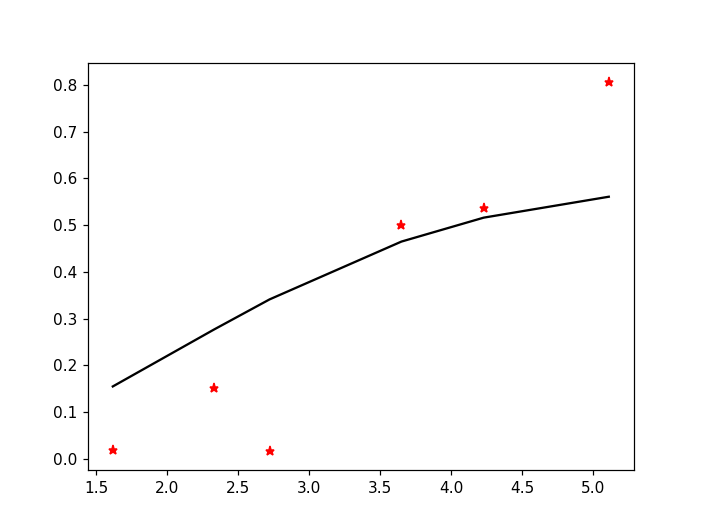

In [100]:
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [3.3, 4.4, 1.47],
                 [4.7, 3.8, 1.74]])

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
OK = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='gaussian',
                     verbose=False, enable_plotting=True)

# # Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# # grid of points, on a masked rectangular grid of points, or with arbitrary points.
# # (See OrdinaryKriging.__doc__ for more information.)
# z, ss = OK.execute('grid', gridx, gridy)

# # Writes the kriged grid to an ASCII grid file.
# kt.write_asc_grid(gridx, gridy, z, filename="output.asc")

In [98]:
help(OrdinaryKriging)

Help on class OrdinaryKriging in module pykrige.ok:

class OrdinaryKriging(builtins.object)
 |  OrdinaryKriging(x, y, z, variogram_model='linear', variogram_parameters=None, variogram_function=None, nlags=6, weight=False, anisotropy_scaling=1.0, anisotropy_angle=0.0, verbose=False, enable_plotting=False, enable_statistics=False, coordinates_type='euclidean')
 |  
 |  Convenience class for easy access to 2D Ordinary Kriging.
 |  
 |  Parameters
 |  ----------
 |  x : array_like
 |      X-coordinates of data points.
 |  y : array_like
 |      Y-coordinates of data points.
 |  z : array-like
 |      Values at data points.
 |  variogram_model : str or GSTools CovModel, optional
 |      Specifies which variogram model to use; may be one of the following:
 |      linear, power, gaussian, spherical, exponential, hole-effect.
 |      Default is linear variogram model. To utilize a custom variogram model,
 |      specify 'custom'; you must also provide variogram_parameters and
 |      variogram

# Visualize UWB location points

In [ ]:
for time in UWB_data.index:
    for locid in BLE_data.locid.unique():
        time_min = BLE_data[BLE_data.locid == locid].time.min()
        time_max = BLE_data[BLE_data.locid == locid].time.max()
        if np.logical_and(time_min < time, time < time_max):
            UWB_data.loc[time, 'locid'] = locid
UWB_data = UWB_data.dropna()

for locid in BLE_data.locid.unique():
    temp = UWB_data[UWB_data['locid'] == locid]
    ax.scatter(list(temp['x']), list(temp['y']), list(temp['z']), s=5, color=np.random.rand(3,), alpha=0.2)

# Visualize BLE data fluctuation

In [ ]:
beacon_color = {}
beacon_id = BLE_data.uid.unique()
for beacon in beacon_id:
    beacon_color[beacon] = np.random.rand(3,)
beacon_color

In [ ]:
fig_2, axs = plt.subplots(6, 1, figsize=(10, 20))
ix = 0
for locid in BLE_data.locid.unique():
    temp = BLE_data[BLE_data.locid == locid]
    for beacon in beacon_id:
        beacon_subdf = temp[temp.uid == beacon]
        axs[ix].plot(beacon_subdf.num, beacon_subdf.rssi, label = beacon,color=beacon_color[beacon])
    axs[ix].set_title(locid)
    ix += 1
plt.legend()
plt.show()